### Required packages preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay
import seaborn as sns
from sklearn import metrics
import xgboost as xgb
import lightgbm as lgb

/Users/alexxu/opt/miniconda3/envs/py39/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


### Data preparation

In [2]:
smoke_df = pd.read_csv("/Users/alexxu/Downloads/smoking.csv", index_col=0)

X = smoke_df.drop('smoking', axis=1)
y = smoke_df['smoking']
X = pd.get_dummies(X, columns = ['gender', 'oral', 'tartar'])

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

### Model training and evaluation

/Users/alexxu/.local/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/alexxu/opt/miniconda3/envs/py39/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:21:46] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


(0.5, 1.0)

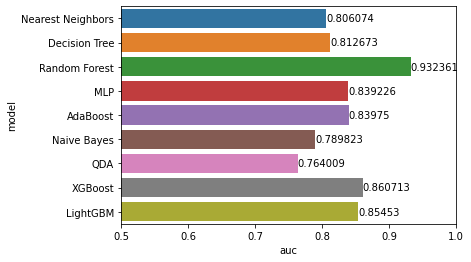

In [3]:

names = [
    "Nearest Neighbors",
    "Decision Tree",
    "Random Forest",
    "MLP",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
    "XGBoost",
    "LightGBM",
]

classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(n_estimators=1000),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    xgb.XGBClassifier(),
    lgb.LGBMClassifier(),
]

auc_list = []
for i, clf in enumerate(classifiers):
    clf.fit(X_train, y_train)
    auc = metrics.roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
    auc_list.append(auc)

res_df = pd.DataFrame({'model': names, 'auc': auc_list})

sns.barplot(x='auc', y='model', data=res_df)
ax = plt.gca()
ax.bar_label(ax.containers[0])
ax.set_xlim([0.5, 1.0])

/Users/alexxu/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


<Figure size 1080x720 with 0 Axes>

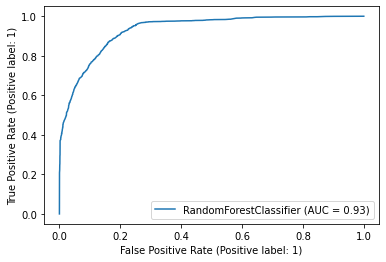

In [4]:
# RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train, y_train)
auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
figure = plt.figure(figsize=(15, 10))
metrics.plot_roc_curve(model, X_test, y_test)

### Model comparison plot

In [5]:
res_df['auc'] = np.ceil(res_df.auc * 10**3) / (10**3)
res_df_sort = res_df.sort_values('auc', ascending=False)

/Users/alexxu/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


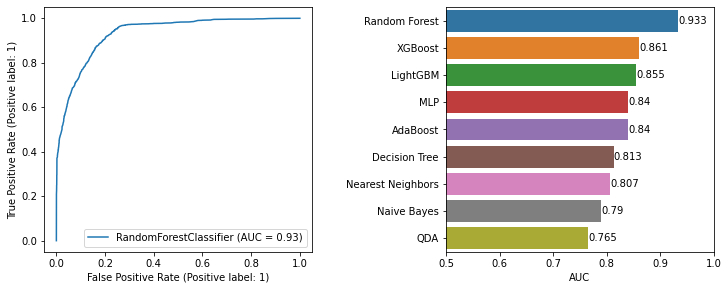

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4.5))
fig.subplots_adjust(wspace=0.5)

metrics.plot_roc_curve(model, X_test, y_test, ax=ax[0])
sns.barplot(x='auc', y='model', data=res_df_sort, ax=ax[1]).bar_label(ax[1].containers[0])
ax[1].set_xlim(0.5, 1.0)
ax[1].set_xlabel('AUC')
ax[1].set_ylabel('')
plt.savefig('model_compare.png', bbox_inches='tight', dpi=300)

### Featurea Importance

In [8]:
smoke_df = pd.read_csv("/Users/alexxu/Downloads/smoking.csv", index_col=0)

X = smoke_df.drop('smoking', axis=1)
y = smoke_df['smoking']
X = pd.get_dummies(X, columns = ['gender', 'oral', 'tartar'])

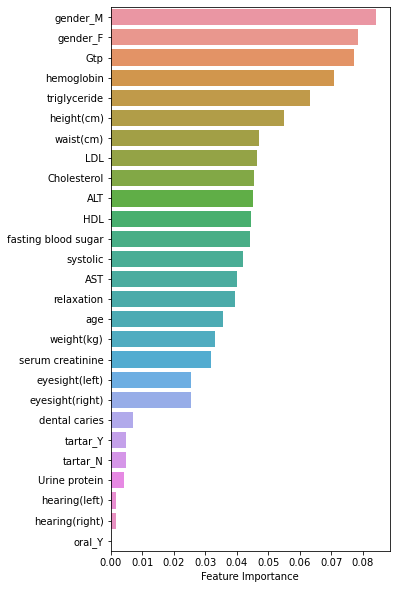

In [9]:
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

figure = plt.figure(figsize=(5, 10))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.ylabel('')
plt.xlabel('Feature Importance')
plt.savefig('feature_importance.pdf', bbox_inches='tight')

### Training with limited features

In [10]:
smoke_df = pd.read_csv("/Users/alexxu/Downloads/smoking.csv", index_col=0)

In [11]:
smoke_df.columns

Index(['gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries',
       'tartar', 'smoking'],
      dtype='object')

In [12]:
subset_df = smoke_df[['gender', 'hemoglobin', 'Gtp', 'smoking']]

In [13]:
X = subset_df.drop('smoking', axis=1)
y = subset_df['smoking']
X = pd.get_dummies(X, columns = ['gender'])

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

In [14]:
names = [
    "Nearest Neighbors",
    "Decision Tree",
    "Random Forest",
    "MLP",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
    "XGBoost",
    "LightGBM",
]

classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(n_estimators=1000),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    xgb.XGBClassifier(),
    lgb.LGBMClassifier(),
]

auc_list = []
for i, clf in enumerate(classifiers):
    clf.fit(X_train, y_train)
    auc = metrics.roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
    auc_list.append(auc)

res_df = pd.DataFrame({'model': names, 'auc': auc_list})

/Users/alexxu/.local/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/alexxu/opt/miniconda3/envs/py39/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:24:06] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


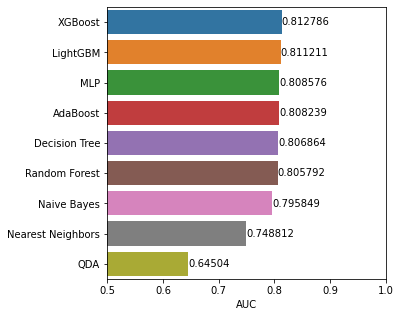

In [15]:
res_df = res_df.sort_values('auc', ascending=False)
figure = plt.figure(figsize=(5, 5))
sns.barplot(x='auc', y='model', data=res_df)
ax = plt.gca()
ax.bar_label(ax.containers[0])
ax.set_xlim([0.5, 1.0])
ax.set_ylabel('')
ax.set_xlabel('AUC')
plt.savefig('model_compare_2.png', bbox_inches='tight', dpi=300)